<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
from keras.datasets import boston_housing
import pandas as pd

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


Using TensorFlow backend.


In [2]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [3]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
y = y_train

y = y_train / y_train.max()

x = x_train

In [5]:
#normalize
import keras
keras.utils.normalize(x_train, axis=0, order=2)

array([[6.15626701e-03, 0.00000000e+00, 3.10983151e-02, ...,
        5.61526372e-02, 5.38018011e-02, 6.35435054e-02],
       [1.08742552e-04, 1.55659962e-01, 7.75547662e-03, ...,
        3.93068460e-02, 5.35957574e-02, 1.05566401e-02],
       [2.44669243e-02, 0.00000000e+00, 6.91498162e-02, ...,
        5.40134891e-02, 5.09036340e-02, 1.10658028e-02],
       ...,
       [1.73128932e-04, 6.60375595e-02, 2.31518169e-02, ...,
        4.51895032e-02, 4.91048185e-02, 2.65782931e-02],
       [1.07352925e-02, 0.00000000e+00, 7.48040553e-02, ...,
        3.93068460e-02, 3.55086465e-02, 5.35978606e-02],
       [7.18789766e-05, 1.13207245e-01, 1.11938653e-02, ...,
        4.17133876e-02, 5.10635890e-02, 1.48675509e-02]])

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation


model = Sequential([
    Dense(13, input_shape=(13,)),
    Dense(13),
    Dense(13),
])

model.add(Dense(1, input_shape=(13,)))


model.compile(optimizer='rmsprop',
             loss='mse', 
             metrics=['mae'])



model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, batch_size=100, epochs=100, validation_split=.10)
scores = model.evaluate(x_test, y_test)
print(model.metrics_names)


Train on 363 samples, validate on 41 samples
Epoch 1/100
363/363 [==============================] - 0s 314us/step - loss: 6863.3363 - mae: 73.8147 - val_loss: 4259.5601 - val_mae: 58.8906
Epoch 2/100
363/363 [==============================] - 0s 19us/step - loss: 3369.0934 - mae: 51.3896 - val_loss: 2552.5728 - val_mae: 45.5633
Epoch 3/100
363/363 [==============================] - 0s 14us/step - loss: 2042.8383 - mae: 39.8876 - val_loss: 1537.9943 - val_mae: 34.4738
Epoch 4/100
363/363 [==============================] - 0s 22us/step - loss: 1245.5323 - mae: 30.4792 - val_loss: 947.3632 - val_mae: 27.9976
Epoch 5/100
363/363 [==============================] - 0s 17us/step - loss: 774.0013 - mae: 24.0309 - val_loss: 502.2962 - val_mae: 19.6770
Epoch 6/100
363/363 [==============================] - 0s 22us/step - loss: 419.7396 - mae: 17.4803 - val_loss: 268.0198 - val_mae: 13.7012
Epoch 7/100
363/363 [==============================] - 0s 14us/step - loss: 247.2901 - mae: 12.9528 - val_l

In [8]:
import matplotlib.pyplot as plt

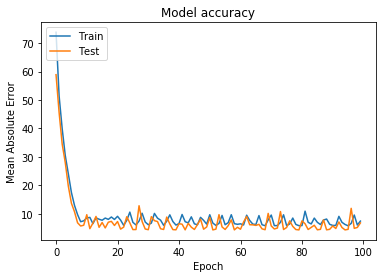

In [9]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

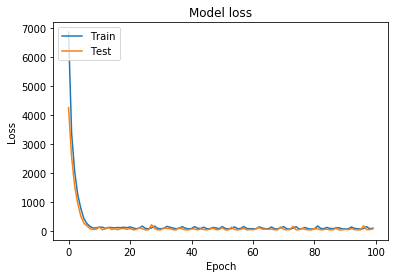

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

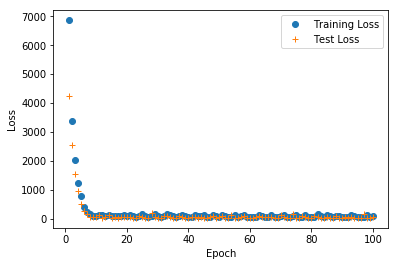

In [11]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'o')
plt.plot(epoch_count, test_loss, '+')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Coefficients: 
 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.720905667266178


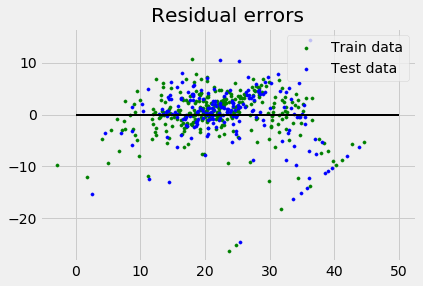

In [12]:
#Linear Regression Model for Comparison
from sklearn import datasets, linear_model, metrics 
  
# load the boston dataset 
boston = datasets.load_boston(return_X_y=False) 
  
# defining feature matrix(X) and response vector(y) 
X = boston.data 
y = boston.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

plt.style.use('fivethirtyeight') 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [13]:
#Feature Engineering


In [14]:
#Compare Models

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [24]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


In [25]:
batch_size = 64
num_classes = 10
epochs = 20

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [28]:
train_images = train_images / 255.0
test_images = test_images / 255.0

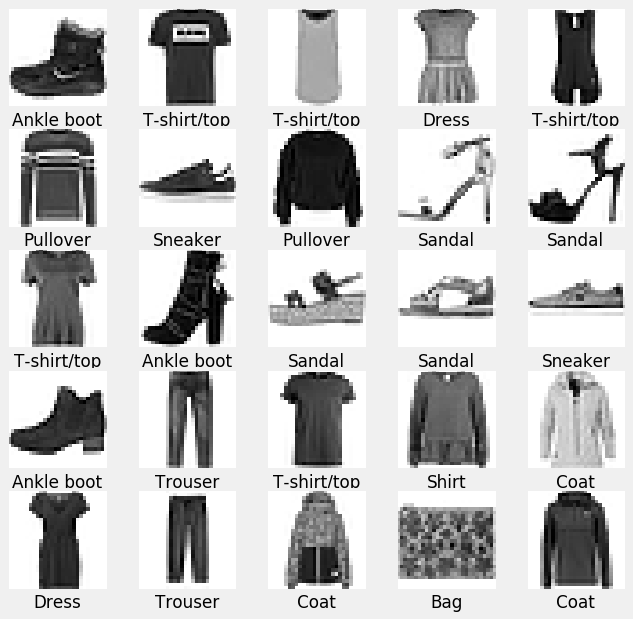

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5012 - accuracy: 0.8228
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3768 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3419 - accuracy: 0.8760
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3171 - accuracy: 0.8826
Epoch 5/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2995 - accuracy: 0.8891
Epoch 6/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2827 - accuracy: 0.8957
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2706 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2600 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2510 - accuracy: 0.9073
Epoch 10/10
60

In [36]:
predictions=model.predict(test_images)

In [37]:
predictions[0]

array([1.4360352e-06, 2.9696217e-09, 5.1217793e-08, 1.6043620e-11,
       9.5161649e-11, 6.5153711e-03, 6.1987251e-08, 1.5524261e-03,
       1.1960857e-06, 9.9192953e-01], dtype=float32)

In [39]:
import numpy as np
np.argmax(predictions[0])

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

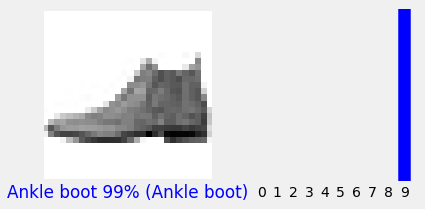

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

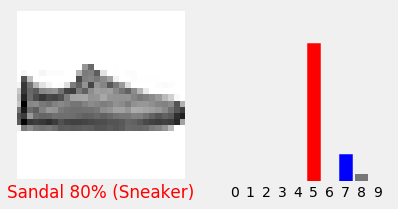

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

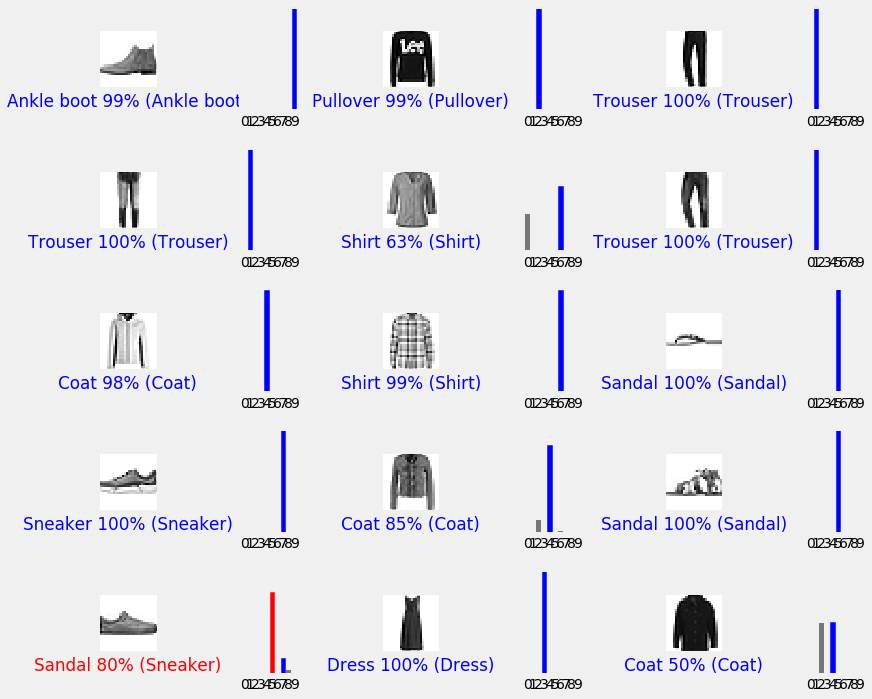

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [46]:
img = test_images[143]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


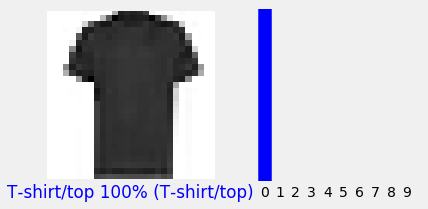

In [50]:
i = 143
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [51]:
predictions_single = model.predict(img)
print(predictions_single)

[[9.9950278e-01 2.0495096e-07 5.3788568e-05 3.1572981e-06 5.7501794e-09
  3.5135206e-12 4.3748840e-04 8.1540718e-14 2.5735274e-06 6.8419548e-11]]


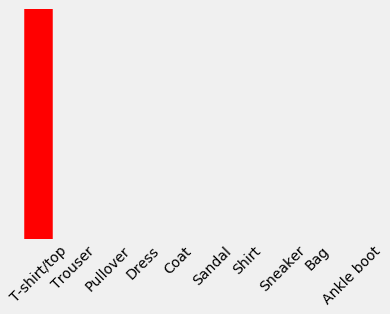

In [52]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
np.argmax(predictions_single[0])

0

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.